In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 32s 3us/step


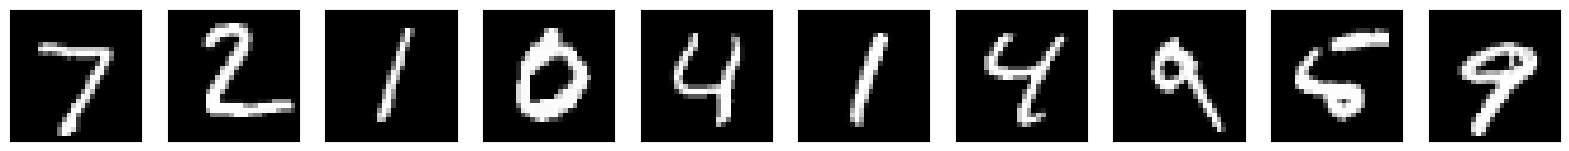

In [12]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [16]:
print("previous x_train shape: {}  \nprevious y_train shape:{}".format(x_train.shape, y_train.shape))
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

previous x_train shape: (60000, 28, 28)  
previous y_train shape:(60000,)


In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [22]:
classes = 10
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)
print('New x_train shape: {} \nNew y_train shape: {}' . format(x_train.shape, y_train.shape))

New x_train shape: (60000, 784) 
New y_train shape: (60000, 10)


In [24]:
input_size = 784
batch_size = 200
hidden1 = 400
hidden2 = 20
classes = 10
epochs = 10

In [36]:
model = Sequential()
model.add(Dense(hidden1, input_dim=input_size, activation= 'relu'))
model.add(Dense(hidden2, activation = 'relu'))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer = 'sgd')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │           8,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,230 (1.23 MB)

 Trainable params: 322,230 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from time import time
tic = time()
model.fit(x_train, y_train, batch_size= batch_size, epochs=epochs, verbose=1)
toc = time()
print("model training took {} secs".format(toc-tic))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4219 - loss: 1.8548
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8197 - loss: 0.7556
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8710 - loss: 0.5041
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8891 - loss: 0.4170
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8992 - loss: 0.3759
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9058 - loss: 0.3428
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9106 - loss: 0.3232
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9142 - loss: 0.3071
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9168 - loss: 0.2918
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9222 - loss: 0.2791
model training took 21.71775984764099 secs


In [40]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
y_pred_prob = model.predict(x_test, verbose=0)
y_pred = np.where (y_pred_prob>0.5, 1, 0)
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}". format(test_accuracy))


Test accuracy: 0.906


In [46]:
mask = range(20,50)
x_valid = x_test[0:20]
actual_labels = y_test[0:20]
y_pred_probs_valid = model.predict(x_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1,0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


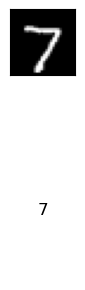

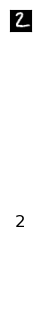

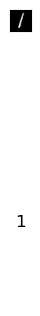

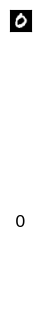

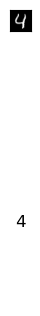

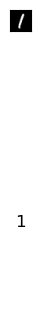

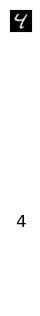

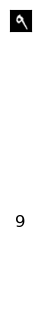

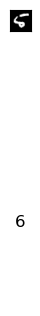

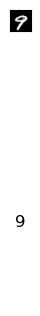

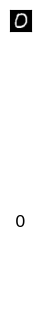

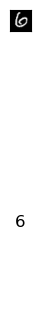

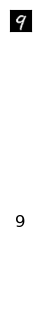

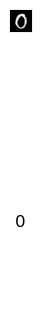

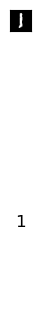

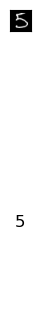

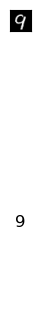

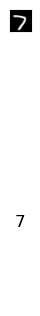

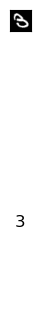

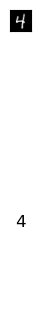

In [54]:
n = len(x_valid)
plt.figure(figsize = (20, 4))
for i in range (n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i+1+n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize = 12, ha= 'center', va= 'center')
    plt.axis('off')
    plt.show()
    plt.close()
    